#One-dimensional bayes classifier


This report describes the code provided to implement a one-dimensional Naive Bayes classification model for two classes. The code is written in Python and uses the libraries:


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from scipy.stats import norm

Once the libraries to be used have been defined, the next step is to declare the gaussian() function, which calculates the normal distribution for a given value of x, mean and standard deviation. The normal distribution is a continuous probability distribution that is symmetric about its mean and has one standard deviation on either side of the mean.


In [ ]:
def gaussian(x, mu, std):
    return (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-(x - mu)**2 / (2 * std**2))

Once the Gaussian function is defined, the next step is to generate the data set for each class, by definition of the exercise, the first set (Class 1) has a mean of 2 and a standard deviation of 0.8 (it will be represented by the color red) , the second set (Class 2) has a mean of 4 and standard deviation of 0.4 (it will be represented by the color blue), below you can see the code used to generate the data set and its distribution across the plot


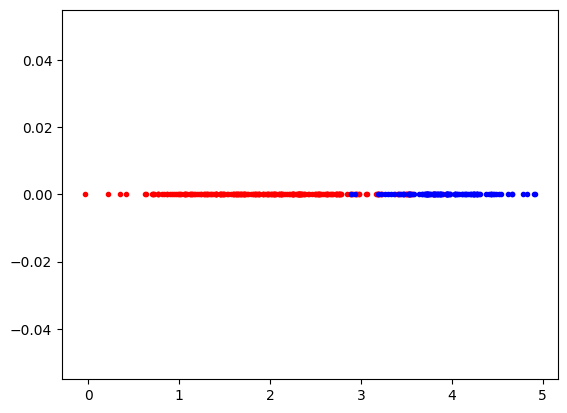

In [ ]:
np.random.seed(0)
x1 = np.random.normal(2, 0.8, 240)
y1 = np.zeros(len(x1))
x2 = np.random.normal(4, 0.4, 120)
y2 = np.ones(len(x2))
y2_print = np.zeros(len(x2))

plt.scatter(x1, y1, color='red', marker='.')
plt.scatter(x2, y2_print, color='blue', marker='.')
plt.show()

With the data generated, it can now be divided into training and testing sets. The training set is used to train the model and the testing set is used to evaluate the model's performance. The data is split using the "train_test_split" function. After this, the data is trained using a Naive Bayes classification model (as defined in the function above). Finally, it is possible to view the test result with the y_pred array


In [ ]:
np.random.seed(0)
x1 = np.random.normal(2, 0.8, 240)
x2 = np.random.normal(4, 0.4, 120)

x = np.concatenate((x1, x2))
y = np.concatenate((np.zeros(len(x1)), np.ones(len(x2))))

mu1, std1 = norm.fit(x1)
mu2, std2 = norm.fit(x2)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.1, random_state=42)

y_pred = [1 if gaussian(xi, mu1, std1) < gaussian(xi, mu2, std2) else 0 for xi in x_teste]

print(y_pred)

[0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0]


Once the network has been trained and tested, it is very important to evaluate its performance. The number of hits, the number of errors and the percentage of hits are calculated below:


In [ ]:
acertos = np.sum(y_teste == y_pred)
erros = len(y_teste) - acertos
percentual_acertos = acertos / len(y_teste) * 100
percentual_erros = erros / len(y_teste) * 100

print(f'{round(percentual_acertos,2)}%')

97.22%


Once the network has been trained, tested and the data collected and stored in variables, we can then generate the sample distribution graph with the parameterized Gaussians as shown in the code below:


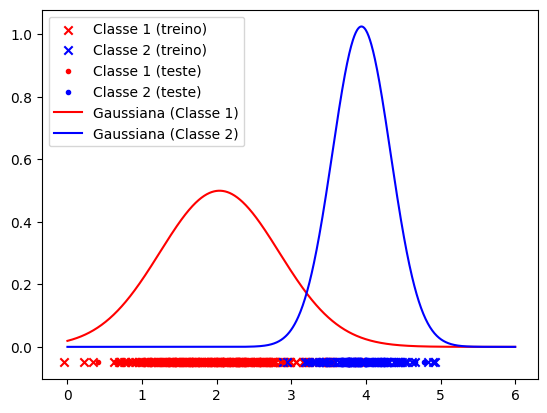

In [ ]:
plt.scatter(x_treino[y_treino == 0], y_treino[y_treino == 0]-0.05, color='red', marker='x', label='Classe 1 (treino)')
plt.scatter(x_treino[y_treino == 1], y_treino[y_treino == 1]-1.05, color='blue', marker='x', label='Classe 2 (treino)')
plt.scatter(x_teste[y_teste == 0], y_teste[y_teste == 0]-0.05, color='red', marker='.', label='Classe 1 (teste)')
plt.scatter(x_teste[y_teste == 1], y_teste[y_teste == 1]-1.05, color='blue', marker='.', label='Classe 2 (teste)')

x_range = np.linspace(0, 6, 1000)

pdf1 = norm.pdf(x_range, mu1, std1)
pdf2 = norm.pdf(x_range, mu2, std2)

plt.plot(x_range, pdf1, color='red', label='Gaussiana (Classe 1)')
plt.plot(x_range, pdf2, color='blue', label='Gaussiana (Classe 2)')

plt.legend()
plt.show()

The scatterplot shows that the two classes are well separated. The kernel density estimates for each class show that class 1 has a normal distribution with mean 2 and standard deviation 0.8, while class 2 has a normal distribution with mean 4 and standard deviation 0.4. Furthermore, the accuracy of the model was very high, that is, the implementation used was able to solve this problem with ease.

With this, it is possible to conclude that the implementation of univariate Bayer was a success and all results obtained are as expected.
